<a href="https://colab.research.google.com/github/Shubhangani-Tiwari/Supervised-M.L-Project--Transport-Demand-Prediction/blob/main/Demand_prdiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Nairobi Transport Data.zip')
df

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49
...,...,...,...,...,...,...,...,...,...,...
51640,13826,9B,Mpesa,8V2XDDZR6V,20-04-18,8:00,Awendo,Nairobi,Bus,49
51641,13809,18A,Mpesa,4PEBSVJSNK,20-04-18,8:00,Migori,Nairobi,Bus,49
51642,13809,17A,Mpesa,LVN64LZDNN,20-04-18,8:00,Migori,Nairobi,Bus,49
51643,13796,16B,Mpesa,REYBSKTYWN,20-04-18,7:08,Awendo,Nairobi,Bus,49


In [ ]:
df.shape

(51645, 10)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51645 entries, 0 to 51644
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   ride_id          51645 non-null  int64 
 1   seat_number      51645 non-null  object
 2   payment_method   51645 non-null  object
 3   payment_receipt  51645 non-null  object
 4   travel_date      51645 non-null  object
 5   travel_time      51645 non-null  object
 6   travel_from      51645 non-null  object
 7   travel_to        51645 non-null  object
 8   car_type         51645 non-null  object
 9   max_capacity     51645 non-null  int64 
dtypes: int64(2), object(8)
memory usage: 3.9+ MB


In [ ]:
df.isnull().sum()

ride_id            0
seat_number        0
payment_method     0
payment_receipt    0
travel_date        0
travel_time        0
travel_from        0
travel_to          0
car_type           0
max_capacity       0
dtype: int64

In [ ]:
df.describe(include='object')

,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type
count,51645,51645,51645,51645,51645,51645,51645,51645
unique,61,2,51645,149,78,17,1,2
top,1,Mpesa,UZUEHCBUSO,10-12-17,7:09,Kisii,Nairobi,Bus
freq,2065,51532,1,856,3926,22607,51645,31985


In [ ]:
df.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_from', 'travel_to', 'car_type',
       'max_capacity'],
      dtype='object')

In [ ]:
df['travel_from'].unique()

array(['Migori', 'Keroka', 'Homa Bay', 'Kisii', 'Keumbu', 'Rongo',
       'Kijauri', 'Oyugis', 'Awendo', 'Sirare', 'Nyachenge', 'Kehancha',
       'Kendu Bay', 'Sori', 'Rodi', 'Mbita', 'Ndhiwa'], dtype=object)

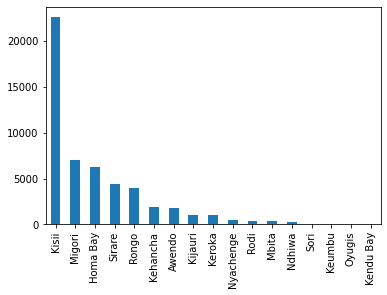

In [ ]:
df['travel_from'].value_counts().plot(kind='bar')
plt.show()

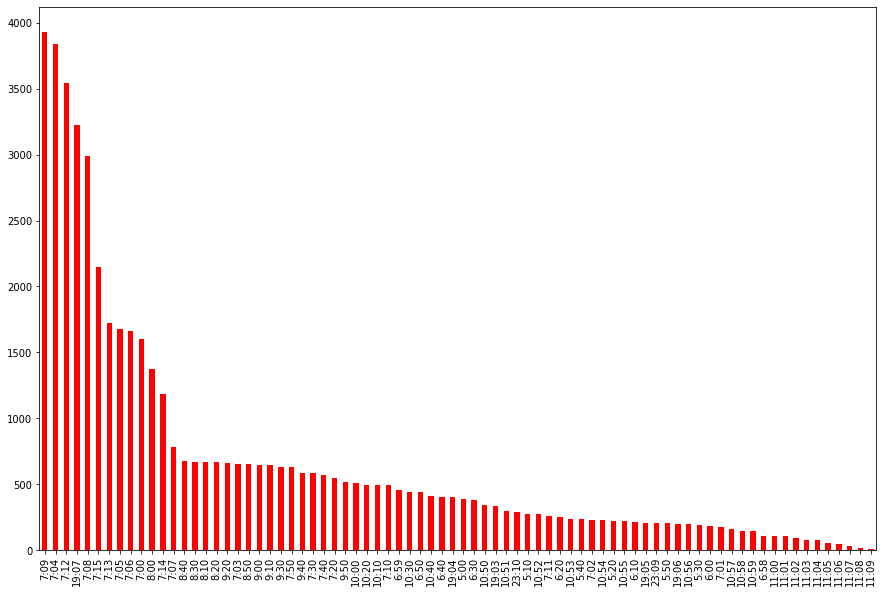

In [ ]:
df['travel_time'].value_counts().plot(kind='bar',figsize=(15,10),color ='red')
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


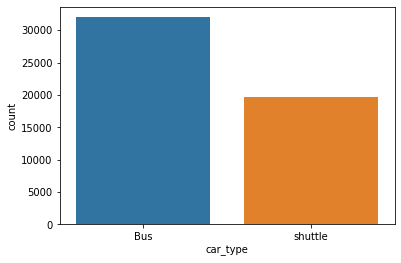

In [ ]:
sns.countplot(df['car_type'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


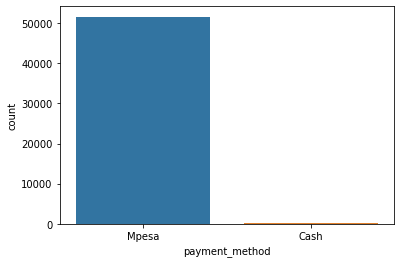

In [ ]:
sns.countplot(df['payment_method'])
plt.show()

/usr/local/lib/python3.8/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


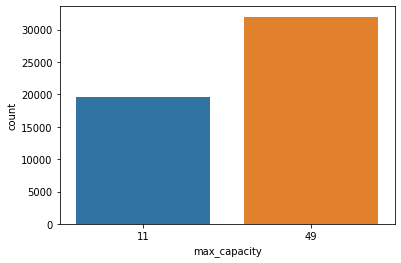

In [ ]:
sns.countplot(df['max_capacity'])
plt.show()

In [ ]:
df['ride_id'].value_counts()

8454     50
13211    49
10834    49
8090     49
11382    49
         ..
10090     1
10091     1
10114     1
10116     1
14304     1
Name: ride_id, Length: 6249, dtype: int64

Since there are total 61645 rows i.e 61645 bookings but only 6249 unique ride_id. This implies that there are more than one seats have booked by single ride_id.

So in order to find the total seat_booking we need to count the different seat numbers corresponding to  single ride_id.

In [ ]:
df.groupby(['ride_id']).seat_number.count()

ride_id
1442      1
5437      1
5710      1
5777      5
5778     31
         ..
20113     9
20114     4
20115     5
20116     1
20117     1
Name: seat_number, Length: 6249, dtype: int64

In [ ]:
totl_tickit=df.groupby(['ride_id']).seat_number.count().rename("number_of_tickit").reset_index()

In [ ]:
df=df.drop_duplicates('ride_id')

In [ ]:
df.shape

(6249, 10)

In [ ]:
df =df.merge(totl_tickit,on= 'ride_id')
df.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,number_of_tickit
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,1
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,1
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,1
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,5
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,31
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,26
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,1
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,1
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,2
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,1


In [ ]:
df.drop(['seat_number','payment_receipt','payment_method','travel_to'],axis=1)

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity,number_of_tickit
0,1442,17-10-17,7:15,Migori,Bus,49,1
1,5437,19-11-17,7:12,Migori,Bus,49,1
2,5710,26-11-17,7:05,Keroka,Bus,49,1
3,5777,27-11-17,7:10,Homa Bay,Bus,49,5
4,5778,27-11-17,7:12,Migori,Bus,49,31
...,...,...,...,...,...,...,...
6244,13812,20-04-18,23:10,Ndhiwa,Bus,49,11
6245,13813,20-04-18,7:05,Ndhiwa,Bus,49,11
6246,13825,20-04-18,7:09,Rongo,Bus,49,1
6247,13826,20-04-18,8:00,Awendo,Bus,49,1


In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
x= df.drop(['number_of_tickit'],axis=1)
y = df['number_of_tickit']

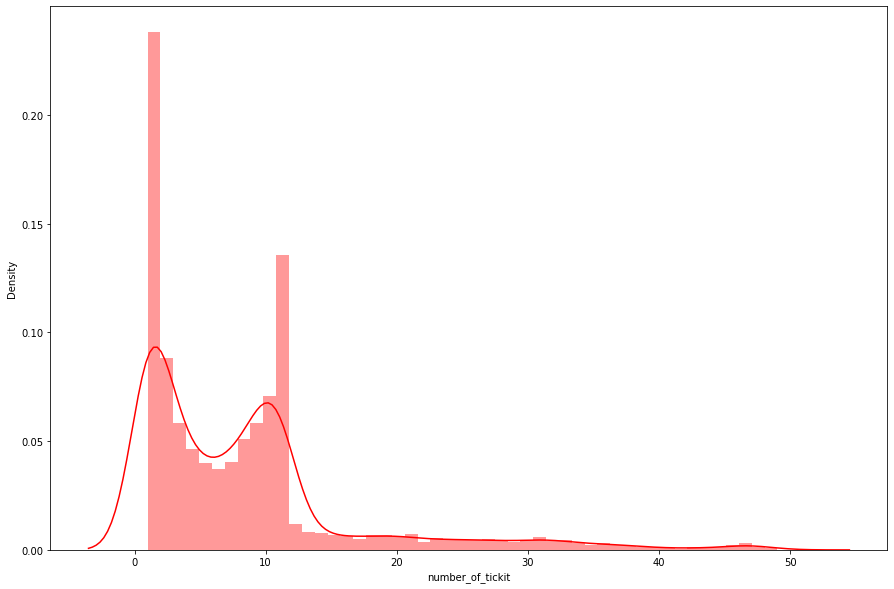

In [ ]:
#Let's check the distribution of dependent variable (number_of_tickit)
plt.figure(figsize=(15,10))
sns.distplot(df['number_of_tickit'],color='r')

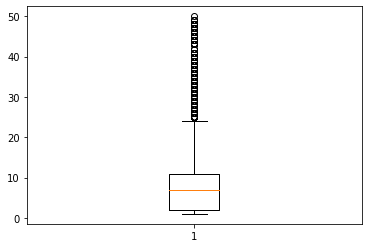

In [ ]:
plt.boxplot(df['number_of_tickit'])
plt.show()

In [ ]:
# creating dataframe to analyse Routes.
routes_tickets = df.groupby(['travel_from'])['number_of_tickit'].sum().reset_index()
routes_tickets

,travel_from,number_of_tickit
0,Awendo,1788
1,Homa Bay,6304
2,Kehancha,1909
3,Kendu Bay,1
4,Keroka,988
5,Keumbu,22
6,Kijauri,1031
7,Kisii,22607
8,Mbita,378
9,Migori,7027


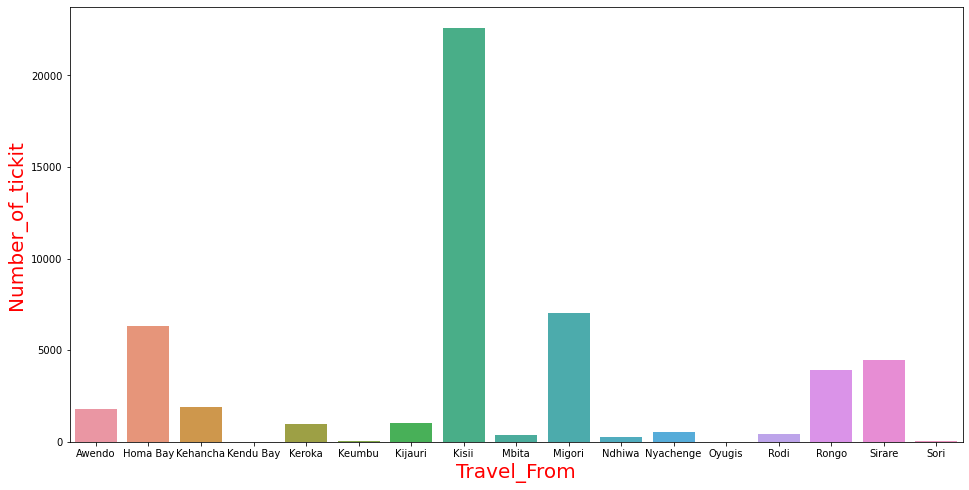

In [ ]:
#plt.figure(figsize=(18,15))
#sns.scatterplot(x = df['travel_from'],y=df['number_of_tickit'])
plt.figure(figsize=(16,8))
sp=sns.barplot(x='travel_from',y='number_of_tickit',data=routes_tickets)
plt.xlabel('Travel_From',color='r',fontsize=20)
plt.ylabel('Number_of_tickit',color='r',fontsize=20)
plt.show()

In the above plot we can see the Total number of ticket sold for each Routes.

we can see that Kisii has most number of tickets sold.

In [ ]:
df["date"]=df["travel_date"]+ " "+df["travel_time"]
df["date"]

0        17-10-17 7:15
1        19-11-17 7:12
2        26-11-17 7:05
3        27-11-17 7:10
4        27-11-17 7:12
             ...      
6244    20-04-18 23:10
6245     20-04-18 7:05
6246     20-04-18 7:09
6247     20-04-18 8:00
6248     14-11-17 5:10
Name: date, Length: 6249, dtype: object

In [ ]:
def  time_features(df1): 

  '''This function takes dataframe as an argument and extracts the
  different features from the date variable of the dataset and finaly returns the updated 
  dataset'''
  
  df1["date"]=pd.to_datetime(df1["date"])
  df1["day_of_week"]=df1["date"].dt.dayofweek
  df1["day_of_year"]=df1["date"].dt.dayofyear
  df1["day_of_month"]=df1["date"].dt.day
  df1["year_woy"]=df1["date"].dt.year.astype(str)+df1["date"].dt.weekofyear.astype(str)
  df1["hour"]=df1["date"].dt.hour
  df1["minute"]=df1["date"].dt.minute
  df1["is_weekend"]=df1["day_of_week"].apply( lambda x : 1 if x  in [5,6] else 0 )
  df1["year"]=df1["date"].dt.year
  df1["quarter"]=df1["date"].dt.quarter
  df1["month"]=df1["date"].dt.month
  return df1

In [ ]:
df_new = time_features(df)
df_new.shape

(6249, 22)

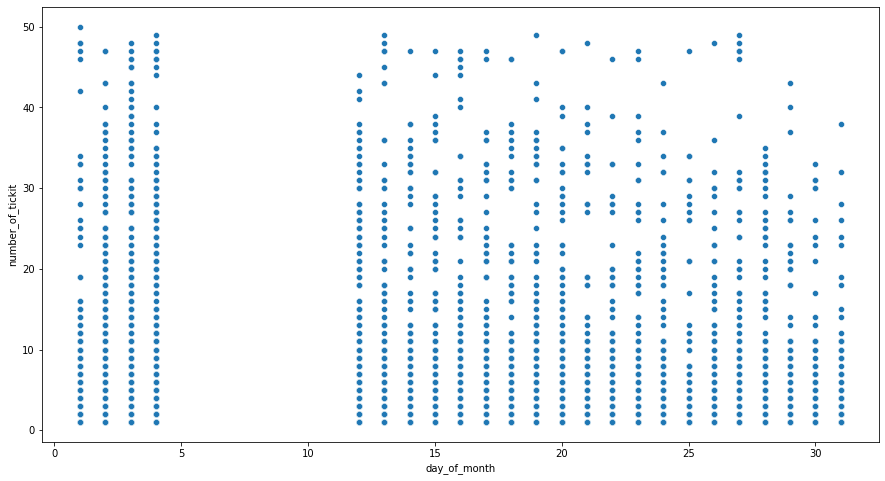

In [ ]:
#scatter plot to understand day of month relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df_new['day_of_month'],y= df_new['number_of_tickit'])

# **Observation**

We can see that there is the gap between 5 to 11 in the day of the month. We can assume that there is official holyday of public transport between these days. we can also say that the number of tickets in all the days of month are almost same.

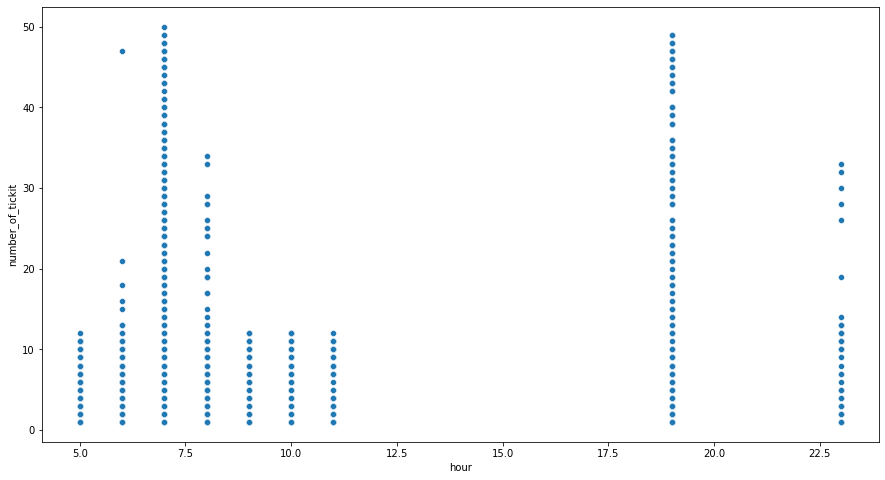

In [ ]:
#scatter plot to understand hour relation with number of tickets.
plt.rcParams['figure.figsize']= (15,8)
sns.scatterplot(x=df_new['hour'],y= df_new['number_of_tickit'])

## **Observation:**

We can see that most of the ticktes were sold at 7 AM and 8 PM. And that seems true because in the morning most of the people go to the work and office.

From the above we can say that there is no ride between 12pm to 5.30Pm

## **Let's add distance and time taken column in our dataset using Google Maps**

In [ ]:
#calculating distance between two points using google maps.
distance = {'Migori': 370 , 'Keroka': 280, 'Homa Bay':360, 'Kisii':305.1, 'Keumbu':295, 'Rongo':332,
'Kijauri':271, 'Oyugis':330.6, 'Awendo':351, 'Sirare':392, 'Nyachenge':326, 'Kehancha': 387.7,
'Kendu Bay':347, 'Sori':399, 'Rodi':348, 'Mbita':401, 'Ndhiwa': 371}
df_new["distance"]=df_new.travel_from.map(distance)

In [ ]:
#calculating travel time between two points using google maps.
#  7*60 is converting hours into minutes.
time = {'Migori': 7*60+8 , 'Keroka': 5*60, 'Homa Bay':7*60, 'Kisii':5*60+34, 'Keumbu':5*60+20, 'Rongo':6*60+21,
'Kijauri':60*4+50,'Oyugis':5*60+50, 'Awendo':6*60+38, 'Sirare':7*60+30, 'Nyachenge':6*60+10, 'Kehancha':7*60+10,
'Kendu Bay':6*60+10, 'Sori':7*60+30, 'Rodi':6*60+40, 'Mbita':7*60+23, 'Ndhiwa': 7*60}
df_new["time_taken"]=df_new.travel_from.map(time)

In [ ]:
df_new.head(10)

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49,...,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49,...,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49,...,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49,...,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49,...,27,201748,7,12,0,2017,4,11,370.0,428
5,5781,22A,Mpesa,VGG7Q3MVJX,27-11-17,7:09,Homa Bay,Nairobi,Bus,49,...,27,201748,7,9,0,2017,4,11,360.0,420
6,5784,1X,Mpesa,3OPU23FHRB,20-04-18,5:10,Kisii,Nairobi,shuttle,11,...,20,201816,5,10,0,2018,2,4,305.1,334
7,5789,1X,Mpesa,BPRX4UMFFN,20-04-18,9:50,Kisii,Nairobi,shuttle,11,...,20,201816,9,50,0,2018,2,4,305.1,334
8,5790,1B,Mpesa,DC8ABRSXXK,20-04-18,7:06,Kisii,Nairobi,Bus,49,...,20,201816,7,6,0,2018,2,4,305.1,334
9,5791,1,Mpesa,HGQURN0SZS,20-04-18,6:00,Kisii,Nairobi,shuttle,11,...,20,201816,6,0,0,2018,2,4,305.1,334


In [ ]:
df["travel_time"] = df["travel_time"].str.split(':').apply(lambda x: int(x[0]) + (int(x[1])/60))

In [ ]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,day_of_month,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Migori,Nairobi,Bus,49,...,17,201742,7,15,0,2017,4,10,370.0,428
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Migori,Nairobi,Bus,49,...,19,201746,7,12,1,2017,4,11,370.0,428
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Keroka,Nairobi,Bus,49,...,26,201747,7,5,1,2017,4,11,280.0,300
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Homa Bay,Nairobi,Bus,49,...,27,201748,7,10,0,2017,4,11,360.0,420
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Migori,Nairobi,Bus,49,...,27,201748,7,12,0,2017,4,11,370.0,428


lets see correlation of distance, time taken and number of tickets.

In [ ]:
corr_columns = df_new[['distance','time_taken', 'number_of_tickit']]

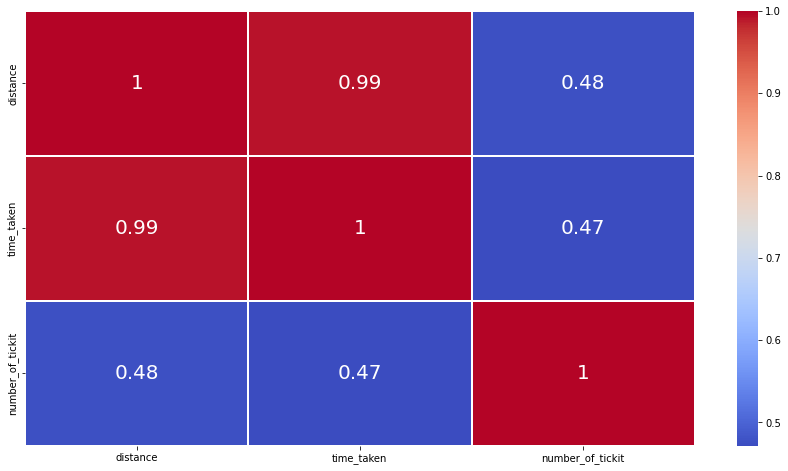

In [ ]:
correlation = corr_columns.corr()
sns.heatmap(abs(correlation),annot=True,annot_kws={'size':20},cmap ='coolwarm',linewidth=1)
plt.show()

#corltn = np.triu(np.ones_like(corr_columns.corr()))
#corltn

#sns.heatmap(corr_columns.corr(),annot=True,mask=corltn)

We can see that distance and time_taken column have strong Multicollinearity with each other.
 so we have to do something about it.

we know that Speed = Distance/Time so we will use it and drop distance and time_taken.

In [ ]:
# create speed column.
df_new['speed']= df_new['distance']/df_new['time_taken']

In [ ]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,...,year_woy,hour,minute,is_weekend,year,quarter,month,distance,time_taken,speed
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Migori,Nairobi,Bus,49,...,201742,7,15,0,2017,4,10,370.0,428,0.864486
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Migori,Nairobi,Bus,49,...,201746,7,12,1,2017,4,11,370.0,428,0.864486
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Keroka,Nairobi,Bus,49,...,201747,7,5,1,2017,4,11,280.0,300,0.933333
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Homa Bay,Nairobi,Bus,49,...,201748,7,10,0,2017,4,11,360.0,420,0.857143
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Migori,Nairobi,Bus,49,...,201748,7,12,0,2017,4,11,370.0,428,0.864486


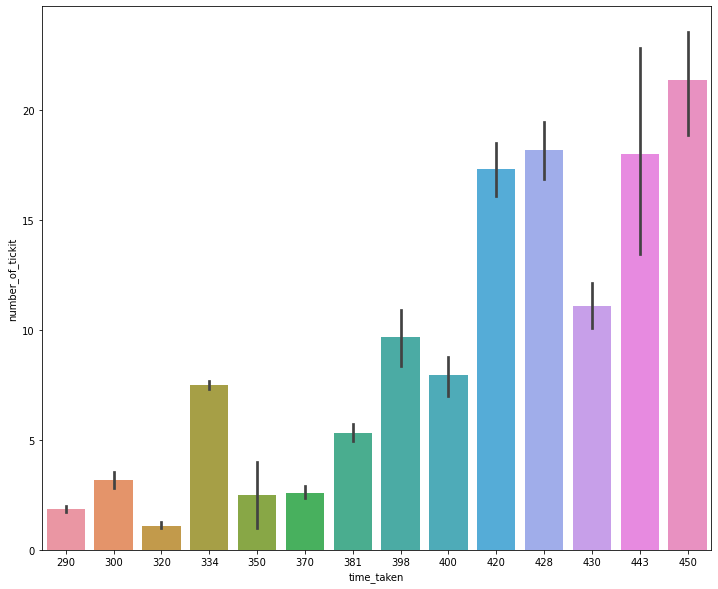

In [ ]:
plt.rcParams['figure.figsize']= (12,10)
sns.barplot(x= 'time_taken',y= 'number_of_tickit', data= df_new)

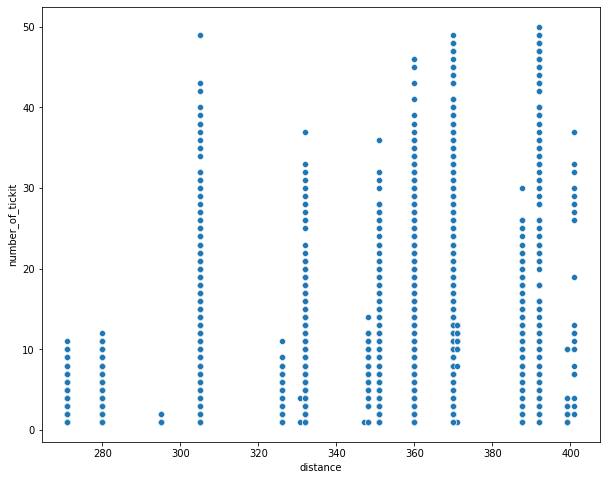

In [ ]:
plt.rcParams['figure.figsize']= (10,8)
sns.scatterplot(x= 'distance',y= 'number_of_tickit', data= df_new)
plt.show()

In [ ]:
num_col = df_new.describe().columns.values
num_col

array(['ride_id', 'travel_time', 'max_capacity', 'number_of_tickit',
       'day_of_week', 'day_of_year', 'day_of_month', 'hour', 'minute',
       'is_weekend', 'year', 'quarter', 'month', 'distance', 'time_taken',
       'speed'], dtype=object)

In [ ]:
#categorical features
cat_col=df_new.describe(include="object").columns.values
cat_col

array(['seat_number', 'payment_method', 'payment_receipt', 'travel_date',
       'travel_from', 'travel_to', 'car_type', 'year_woy'], dtype=object)

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
def calc_vif(W):
  #Calculating VIF
  vif = pd.DataFrame()
  vif["variables"] = W.columns
  vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

  return(vif)

In [ ]:
#check Variance Inflation Factor(VIF)
calc_vif(df_new[[i for i in num_col]])

,variables,VIF
0,ride_id,2.280895e+01
1,travel_time,inf
2,max_capacity,8.833225e+00
3,number_of_tickit,2.780677e+00
4,day_of_week,8.329709e+00
5,day_of_year,7.442119e+04
6,day_of_month,5.396086e+02
7,hour,inf
8,minute,inf
9,is_weekend,3.530248e+00


In [ ]:
calc_vif(df_new[[i for i in num_col if i not in ['minute']]])

,variables,VIF
0,ride_id,22.808949
1,travel_time,1341.083825
2,max_capacity,8.833225
3,number_of_tickit,2.780677
4,day_of_week,8.329709
5,day_of_year,74421.191194
6,day_of_month,539.608599
7,hour,1267.400952
8,is_weekend,3.530248
9,year,157421.740294


In [ ]:
calc_vif(df_new[[i for i in num_col if i not in ['minute','time_taken','distance','travel_time']]])

,variables,VIF
0,ride_id,22.479586
1,max_capacity,6.523408
2,number_of_tickit,2.385037
3,day_of_week,8.321600
4,day_of_year,74137.689620
5,day_of_month,537.394890
6,hour,8.943307
7,is_weekend,3.529132
8,year,4735.690961
9,quarter,117.780605


# **Encoding Categorical features**

In [ ]:
# coverting categorical features into Numerical.
df_new = pd.get_dummies(df_new, columns=['travel_from','car_type'], drop_first=True)

In [ ]:
df_new.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_to,max_capacity,number_of_tickit,date,...,travel_from_Mbita,travel_from_Migori,travel_from_Ndhiwa,travel_from_Nyachenge,travel_from_Oyugis,travel_from_Rodi,travel_from_Rongo,travel_from_Sirare,travel_from_Sori,car_type_shuttle
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7.250000,Nairobi,49,1,2017-10-17 07:15:00,...,0,1,0,0,0,0,0,0,0,0
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7.200000,Nairobi,49,1,2017-11-19 07:12:00,...,0,1,0,0,0,0,0,0,0,0
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7.083333,Nairobi,49,1,2017-11-26 07:05:00,...,0,0,0,0,0,0,0,0,0,0
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7.166667,Nairobi,49,5,2017-11-27 07:10:00,...,0,0,0,0,0,0,0,0,0,0
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7.200000,Nairobi,49,31,2017-11-27 07:12:00,...,0,1,0,0,0,0,0,0,0,0


In [ ]:
data = df_new.copy()
data.columns

Index(['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time', 'travel_to', 'max_capacity',
       'number_of_tickit', 'date', 'day_of_week', 'day_of_year',
       'day_of_month', 'year_woy', 'hour', 'minute', 'is_weekend', 'year',
       'quarter', 'month', 'distance', 'time_taken', 'speed',
       'travel_from_Homa Bay', 'travel_from_Kehancha', 'travel_from_Kendu Bay',
       'travel_from_Keroka', 'travel_from_Keumbu', 'travel_from_Kijauri',
       'travel_from_Kisii', 'travel_from_Mbita', 'travel_from_Migori',
       'travel_from_Ndhiwa', 'travel_from_Nyachenge', 'travel_from_Oyugis',
       'travel_from_Rodi', 'travel_from_Rongo', 'travel_from_Sirare',
       'travel_from_Sori', 'car_type_shuttle'],
      dtype='object')

In [ ]:
data.isnull().sum()

ride_id                  0
seat_number              0
payment_method           0
payment_receipt          0
travel_date              0
travel_time              0
travel_to                0
max_capacity             0
number_of_tickit         0
date                     0
day_of_week              0
day_of_year              0
day_of_month             0
year_woy                 0
hour                     0
minute                   0
is_weekend               0
year                     0
quarter                  0
month                    0
distance                 0
time_taken               0
speed                    0
travel_from_Homa Bay     0
travel_from_Kehancha     0
travel_from_Kendu Bay    0
travel_from_Keroka       0
travel_from_Keumbu       0
travel_from_Kijauri      0
travel_from_Kisii        0
travel_from_Mbita        0
travel_from_Migori       0
travel_from_Ndhiwa       0
travel_from_Nyachenge    0
travel_from_Oyugis       0
travel_from_Rodi         0
travel_from_Rongo        0
t

In [ ]:
unnecessary_cols = ['ride_id', 'seat_number', 'payment_method', 'payment_receipt',
       'travel_date', 'travel_time','distance','number_of_tickit','time_taken', 'travel_to','year_woy','max_capacity','date']


# **implimenting Linear Regression**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
import math

In [ ]:
X= data.drop(unnecessary_cols, axis='columns')
Y= data['number_of_tickit']

In [ ]:
#train test split
X_train, X_test, y_train, y_test = train_test_split(X,Y,test_size=0.25, random_state=50)
reg = LinearRegression()

# fitting linear model
reg.fit(X_train, y_train)

LinearRegression()

In [ ]:
y_pred_train = reg.predict(X_train)
y_test_pred = reg.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test,y_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.41221786959933937
Adjusted r2_score : 0.40187903082356224


In [ ]:
# Model score on Train and Test
train_model = reg.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = reg.score(X_test,y_test)
print('Testing Accuracy:',test_model)

Training Accuracy: 0.3708374611579852
Testing Accuracy: 0.41221786959933937


In [ ]:
def print_metrics(actual, predicted):
  print('MSE is {}'.format(mean_squared_error(actual, predicted)))
  print('RMSE is {}'.format(math.sqrt(mean_squared_error(actual, predicted))))
  print('RMSE is {}'.format(r2_score(actual, predicted)))
  print('MAE is {}'.format(mean_absolute_error(actual, predicted)))
  print('MAPE is {}'.format(np.mean(np.abs((actual - predicted) / actual)) * 100))

In [ ]:
# Test dataset metrics
print_metrics(y_test, y_test_pred)

MSE is 44.28660598529501
RMSE is 6.654818253363123
RMSE is 0.41221786959933937
MAE is 4.567815771544136
MAPE is 151.88515419949934


We can see our model performence is not so good, Lets try some other models.

# **Implementing Lasso Regression** 

In [ ]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import train_test_split

In [ ]:
lasso_data = data.copy()

In [ ]:
#creating dependent and independent variable
X = lasso_data.drop(unnecessary_cols, axis='columns')
Y = lasso_data['number_of_tickit']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state= 0 )

In [ ]:
X_test.shape

(1563, 27)

In [ ]:
#lasso = Lasso()
alphas = [0.01,0.025, 0.15, 1, 5, 8]
for alpha in alphas:
  lasso = Lasso(alpha=alpha ,max_iter= 1500)
  lasso.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',lasso.score(X_test, y_test))
  print('train Score: ',lasso.score(X_train, y_train))


alpha:  0.01
test Score:  0.37544070269471286
train Score:  0.3772042866737091
alpha:  0.025
test Score:  0.36513212504409887
train Score:  0.3701311355433431
alpha:  0.15
test Score:  0.30287530931144735
train Score:  0.3198128252924618
alpha:  1
test Score:  0.0313833955898104
train Score:  0.06191106715102623
alpha:  5
test Score:  0.015559867182215137
train Score:  0.0239668813811017
alpha:  8
test Score:  0.005590566110219908
train Score:  0.008041924208287976


We see that at alpha = 0.01 it give best out of those

In [ ]:
lasso = Lasso(alpha=0.01 , max_iter= 1000 )
lasso.fit(X_train, y_train)

Lasso(alpha=0.01)

In [ ]:
y_pred_train = lasso.predict(X_train)
y_test2_pred = lasso.predict(X_test)

In [ ]:
r2_score_test = r2_score(y_test,y_test2_pred)
print('r2_score:',r2_score_test)

adj_r2=1-(1-r2_score(y_test, y_test2_pred))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1))
print('Adjusted r2_score :',adj_r2)

r2_score: 0.37544070269471286
Adjusted r2_score : 0.36445496912647646


In [ ]:
# Model score on Train and Test
train_model = lasso.score(X_train,y_train)
print('Training Accuracy:',train_model)

test_model = lasso.score(X_test,y_test)
print('Testing Accuracy:',test_model)


Training Accuracy: 0.3772042866737091
Testing Accuracy: 0.37544070269471286


In [ ]:
#Test dataset matrics
print_metrics(y_test, y_test2_pred)

MSE is 47.62081330322519
RMSE is 6.900783528210778
RMSE is 0.37544070269471286
MAE is 4.80627279584529
MAPE is 164.60534125646024


# **Implementing Ridge Regression**

In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import GridSearchCV

In [ ]:
ridge_data = data.copy()

In [ ]:
#creating dependent and independent variable
X= ridge_data.drop(unnecessary_cols, axis='columns')
Y= ridge_data['number_of_tickit']

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25 , random_state= 0 )

In [ ]:
# Hyperprarameter tuning
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25, random_state=42)
ridge = Ridge()
parameters = {'alpha': [1e-15,1e-10,1e-8,1e-5,1e-4,1e-3,1e-2,1,5,10,20,30,40,45,50,55,60,100]}
ridge_regressor = GridSearchCV(ridge, parameters, scoring='neg_mean_squared_error', cv=3)
ridge_regressor.fit(X_train,y_train)

GridSearchCV(cv=3, estimator=Ridge(),
             param_grid={'alpha': [1e-15, 1e-10, 1e-08, 1e-05, 0.0001, 0.001,
                                   0.01, 1, 5, 10, 20, 30, 40, 45, 50, 55, 60,
                                   100]},
             scoring='neg_mean_squared_error')

In [ ]:
print("The best fit alpha value is found out to be :" ,ridge_regressor.best_params_)
print("\nUsing ",ridge_regressor.best_params_, " the negative mean squared error is: ", ridge_regressor.best_score_)

The best fit alpha value is found out to be : {'alpha': 1}

Using  {'alpha': 1}  the negative mean squared error is:  -46.48936050973639


In [ ]:
alphas = [0.01,0.025, 0.1, 1, 5, 8]
for alpha in alphas:
  ridge = Ridge(alpha =alpha, max_iter= 1500)
  ridge.fit(X_train, y_train)
  print('alpha: ',alpha)
  print('test Score: ',ridge.score(X_test, y_test))
  print('train Score: ',ridge.score(X_train, y_train))

alpha:  0.01
test Score:  0.3804678901703803
train Score:  0.38123329476721557
alpha:  0.025
test Score:  0.38047012512788436
train Score:  0.3812329619844216
alpha:  0.1
test Score:  0.38047278513677285
train Score:  0.3812276997583758
alpha:  1
test Score:  0.38008601728766356
train Score:  0.38100821408830854
alpha:  5
test Score:  0.3774660733770775
train Score:  0.3798228461102231
alpha:  8
test Score:  0.37547996104425174
train Score:  0.3789282462157061


In [ ]:
#Model Prediction
y_pred_ridge = ridge_regressor.predict(X_test)
print(ridge_regressor.score(X_train,y_train))
print(ridge_regressor.score(X_test,y_test))

print_metrics(y_test, y_test_pred)

r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

-45.860590195757645
-47.03437136138735
MSE is 95.4871255878128
RMSE is 9.771751408412557
RMSE is -0.1788739259220662
MAE is 6.795291429190023
MAPE is 224.5360299602127
R2 : 0.419318639253793
Adjusted R2 :  0.40910470000939714


In [ ]:
r2 = r2_score(y_test, y_pred_ridge)
print("R2 :" ,r2)
print("Adjusted R2 : ",1-(1-r2_score(y_test, y_pred_ridge))*((X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1)))

R2 : 0.419318639253793
Adjusted R2 :  0.40910470000939714


In [ ]:
#df_new['period'] = np.nan
#df_new.loc[df_new.travel_time < 7, 'period'] = 'em'
#df_new.loc[(df_new.travel_time >= 7) & (df_new.travel_time < 11), 'period'] = 'am'
#df_new.loc[(df_new.travel_time >= 11) & (df_new.travel_time < 15), 'period'] = 'mid'
#df_new.loc[(df_new.travel_time >= 15) & (df_new.travel_time < 19), 'period'] = 'eve'
#df_new.loc[(df_new.travel_time >= 19) & (df_new.travel_time <= 24), 'period'] = 'pm'

In [ ]:
#pcount = dict(df_new['period'].value_counts())
#pcount


#df_new['hourly_travelers'] = np.log1p(df_new['period'].map(pcount))



#dcount = dict(df_new["day_of_year"].value_counts())
#df_new["daily_travelers"] = np.log1p(df_new["day_of_year"].map(dcount))
#df_new.head()

In [ ]:
#df_new.columns

In [ ]:
#df_new.month.value_counts()

In [ ]:
#encoding the car type category data
#df_new["car_type"] = pd.Categorical(df_new["car_type"])
#car_type_categories = df_new.car_type.cat.categories
#df_new["car_type"] = df_new.car_type.cat.codes

In [ ]:
#encoding the travel from category data
#df_new["travel_from"] = pd.Categorical(df_new["travel_from"])
#travel_from_categories = df_new.travel_from.cat.categories
#df["travel_from"] = df_new.travel_from.cat.codes

In [ ]:
#encoding the period
#df_new["period"] = pd.Categorical(df_new["period"])
#period_categories = df_new.period.cat.categories
#df_new["period"] = df_new.period.cat.codes

In [ ]:
#df_new.head()

In [ ]:
#tcount = dict(df["day_of_year"].value_counts())
#df["daily_travelers"] = (df["day_of_year"].map(tcount))

In [ ]:
#creating dependent and independent dataframe
#df_independent, df_dependent = df_new.drop(["number_of_tickit"], axis = 1),df_new["number_of_tickit"]

In [ ]:
#finding the correlation for multilinearity in independent variable
#plt.figure(figsize=(15,8))
#correlation = df_independent.corr()
#sns.heatmap(abs(correlation), annot=True)

In [ ]:
#Dropping the collinear columns
#Collinearcolumns = ["month","max_capacity", "period","quarter"]
#for a in Collinearcolumns:
 # df_independent.drop(a,inplace = True , axis = 1)

In [ ]:
#X=df_independent
#y =df_dependent

In [ ]:
#from statsmodels.stats.outliers_influence import variance_inflation_factor
#def calc_vif(W):

    # Calculating VIF
 #   vif = pd.DataFrame()
  #  vif["variables"] = W.columns
   # vif["VIF"] = [variance_inflation_factor(W.values, i) for i in range(W.shape[1])]

    #return(vif)

In [ ]:
#df_independent.info()